# Data preprocessing and exploration

In [2]:
import os
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf

2023-12-19 01:47:17.367462: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-19 01:47:19.704600: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data_dir = './New Plant Diseases Dataset'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'

### Exploring the number of plants, diseases and each plant/disease image counts

In [4]:
# Store all the train_dir sub directory names in folders list
folders = os.listdir(train_dir)
print(folders)

['Pepper,_bell___Bacterial_spot', 'Apple___healthy', 'Tomato___Early_blight', 'Potato___Early_blight', 'Squash___Powdery_mildew', 'Tomato___Target_Spot', 'Tomato___healthy', 'Grape___Black_rot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Leaf_Mold', 'Cherry_(including_sour)___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Apple___Apple_scab', 'Strawberry___healthy', 'Apple___Cedar_apple_rust', 'Tomato___Tomato_mosaic_virus', 'Corn_(maize)___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Grape___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Blueberry___healthy', 'Peach___Bacterial_spot', 'Pepper,_bell___healthy', 'Grape___Esca_(Black_Measles)', 'Potato___Late_blight', 'Strawberry___Leaf_scorch', 'Raspberry___healthy', 'Apple___Black_rot', 'Corn_(maize)___Northern_Leaf_Blight', 'Potato___healthy', 'Tomato___Late_blight', 'Cherry_(including_sour)___Powdery_mildew', 'Soybean___h

In [5]:
# Count the number of unique plants, number of diseases and total classes

total_class = len(folders)

plants = []
total_disease = 0

for dir_name in folders:
  if dir_name.split('___')[0] not in plants:
    plants.append(dir_name.split('___')[0])
  if dir_name.split('___')[1] != 'healthy':
    total_disease += 1

print("Total classes available: ", total_class)
print("Number of unique plants: ", len(plants))
print("Total number of diseases: ", total_disease)

Total classes available:  38
Number of unique plants:  14
Total number of diseases:  26


In [6]:
# Display per class image count

map = {}
for dir_name in folders:
  map[dir_name] = len(os.listdir(os.path.join(train_dir, dir_name)))

images_per_class = pd.DataFrame(map.values(), index = map.keys(), columns=["Number of Images"])
images_per_class

,Number of Images
"Pepper,_bell___Bacterial_spot",1913
Apple___healthy,2008
Tomato___Early_blight,1920
Potato___Early_blight,1939
Squash___Powdery_mildew,1736
Tomato___Target_Spot,1827
Tomato___healthy,1926
Grape___Black_rot,1888
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,1642
Tomato___Leaf_Mold,1882


### Total images available for training

In [7]:
n_train = 0
for val in map.values():
  n_train += val
print("Total available images for training: ", n_train)

Total available images for training:  70295


## Data preparation

In [8]:
train_arr = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred"
)
valid_arr = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    labels="inferred"
)

Found 70295 files belonging to 38 classes.


2023-12-19 01:48:24.432725: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-19 01:48:24.513739: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-19 01:48:24.514023: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Found 17572 files belonging to 38 classes.


Display some random images along with their classes

2023-12-19 01:48:33.879607: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [70295]
	 [[{{node Placeholder/_4}}]]
2023-12-19 01:48:33.881005: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [70295]
	 [[{{node Placeholder/_4}}]]
2023-12-19 01:48:34.128578: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25165824 exceeds 10% of free system memory.


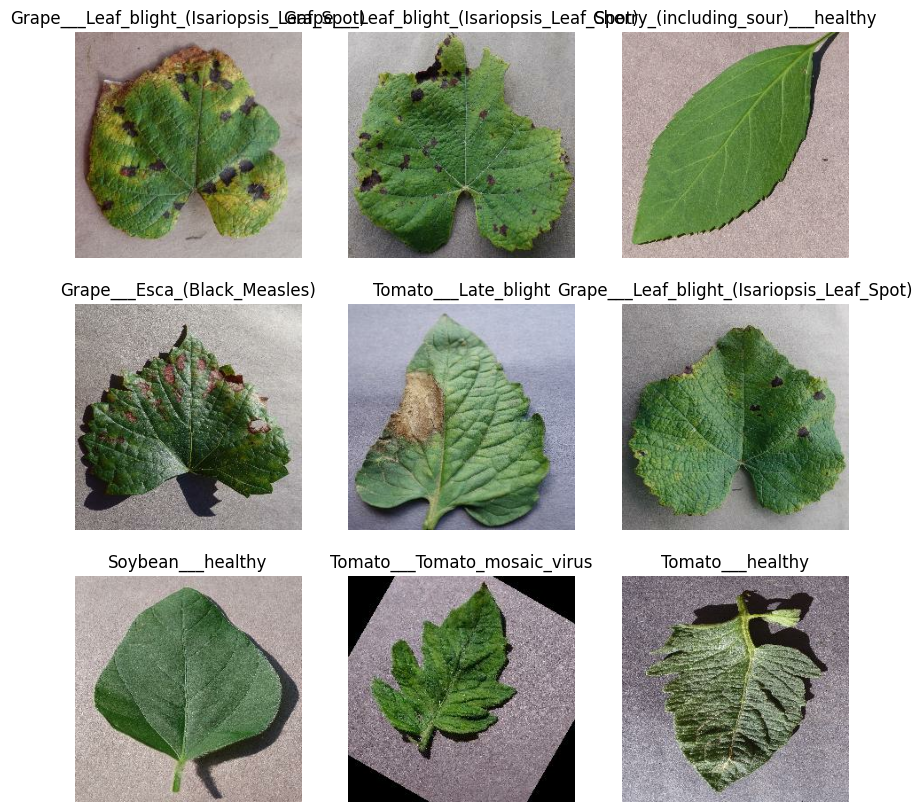

In [9]:
class_name = train_arr.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_arr.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[labels[i]])
    plt.axis("off")

Dimensions of the images

In [10]:
for image_batch, labels_batch in train_arr:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

#32 classes of images with each image of size 256 x 256 x 3

2023-12-19 01:48:55.403775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [70295]
	 [[{{node Placeholder/_4}}]]
2023-12-19 01:48:55.404854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [70295]
	 [[{{node Placeholder/_4}}]]


(32, 256, 256, 3)
(32,)


2023-12-19 01:48:55.639657: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25165824 exceeds 10% of free system memory.
2023-12-19 01:48:55.665151: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25165824 exceeds 10% of free system memory.
